In [ ]:
from bs4 import BeautifulSoup
from downloads import *
import requests
import time
import urllib
import os
from nltk.probability import FreqDist
from NLP import * 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_setting()

In [ ]:
q=input("지원하시는 회사의 이름을 기재해주세요\t")
q2=input("지원하는 회사의 직무를 기재해주세요\t")
try:
    p=int(input("몇 페이지까지 검색할까요?\t\t"))
except:
    p=10
q3=input("공고에 직무에 대한 설명이 있다면 키워드 중심으로 같이 써주세요(없을 시 공란으로 두세요)\t")

In [ ]:
news_list=[]
for page in range(1,p+1):
    url=download("https://search.daum.net/search",params={"w":"news","q":q+" "+q2,"cluster":"y","p":str(page)})
    dom=BeautifulSoup(url.text,"lxml")
    news_list+=[(_["href"], _.text) for _ in dom.select("article .wrap_tit.mg_tit a")]

In [292]:
# import re
# pattern=re.compile("text|article|txt|Article|News")
# if pattern.search("article"):print(1)

In [293]:
# dom.select("[class+{0}],[id+{0}]".format(re.compile("text|article|txt|Article|News")))

In [294]:
# dom.select("[id+{0}]".format(pattern))

In [295]:
# print([_.text for _ in dom.select("[class^={0}],[id^={0}]".format(pattern))])

## 뉴스 솎기

In [296]:
news_list

[('https://cp.news.search.daum.net/p/79756322',
  '[보험업무 RPA 시대-삼성생명]도입 6개월만에 안착 연 2만4000시간 ...'),
 ('http://v.media.daum.net/v/20190417143329712?f=o',
  '로봇에 업무 맡기니 2만 시간 절약..삼성생명의 디지털 혁신'),
 ('https://cp.news.search.daum.net/p/79811253',
  '"우리가 남이가?" 삼성생명, 삼성전자-제일기획 팔고 ‘삼성바이오...'),
 ('http://v.media.daum.net/v/20190417101206118?f=o',
  '삼성생명, RPA 정착으로 디지털혁신 가속화'),
 ('https://cp.news.search.daum.net/p/78534934', '삼성생명 현성철號, 디지털혁신 성과 가시화'),
 ('http://v.media.daum.net/v/20190417182112681?f=o',
  '삼성생명, 로봇 프로세스 자동화로 업무시간 단축'),
 ('http://v.media.daum.net/v/20190515092102660?f=o',
  '삼성생명, 1분기 순익 4473억원..전년 대비 14.7%↑'),
 ('http://v.media.daum.net/v/20190509083900768?f=o',
  '삼성생명 "생명사랑 릴레이로 자살 예방 기부하세요"'),
 ('https://cp.news.search.daum.net/p/78542156', '삼성생명, RPA 정착...연 2만4천시간 절약'),
 ('http://v.media.daum.net/v/20190507103000743?f=o',
  "삼성생명, 총 5000만원 상금 '제1회 전국 탁구클럽 대축제' 개최"),
 ('https://cp.news.search.daum.net/p/78532522',
  '삼성생명, ‘PRA 프로젝트’ 6개월...연간 2만4000시간 절약'),
 ('https://cp.news

In [297]:
title=[title for link,title in news_list]

In [298]:
len(title)

50

In [422]:
title=[title for link,title in news_list]
dist=[]
import textdistance
for i in range(len(title)):
    for _ in title[i:]:
        dist=textdistance.hamming.normalized_similarity(_,title[i])
        if dist>0.2 and dist<1:
            title[i]=np.nan
            print(title[i],_)
            break
# textdistance.hamming('text', 'test')
# textdistance.hamming.normalized_similarity('text', 'test')
# textdistance.hamming('arrow', 'arow')textdistance.hamming.normalized_similarity('arrow', 'arow')

ValueError: too many values to unpack (expected 2)

In [300]:
news_list=pd.DataFrame({"title":title,"link":[link for link,_ in news_list]}).dropna().reset_index().drop("index",1)

In [301]:
# for link, title in news_list:
#     url = download(link)
#     dom = BeautifulSoup(url.text,"lxml")
#     if dom.select("#articletxt"): # 한국 경제
#         print([_.text for _ in dom.select("#articletxt")])
#     elif dom.select("#articleBody p"):# 아이뉴스 
#         print(dom.select("#articleBody p"))
#     elif dom.select("#divNewsContent"):
#         print([_.text for _ in dom.select("#divNewsContent")])
#     elif dom.select("#articleText"):
#         print([_.text for _ in dom.select("#articleText")]) # 헤럴드경제
#     elif dom.select("#articleBody"):
#         print([_.text for _ in dom.select("#articleBody")]) # 전자신문

## 링크 타고들어가서 뉴스 가져오기

In [398]:
css_codes=["#articletxt","#articleBody p","#divNewsContent","#articleText","tbody b","#textBody","#news_body_area_contents", "body_news"]

In [399]:
len(news_list)

32

In [400]:
news_list["link"]

0     http://v.media.daum.net/v/20190417143329712?f=o
1          https://cp.news.search.daum.net/p/79811253
2     http://v.media.daum.net/v/20190520103300854?f=o
3          https://cp.news.search.daum.net/p/78557066
4     http://v.media.daum.net/v/20190512104533601?f=o
5     http://v.media.daum.net/v/20190508135613655?f=o
6          https://cp.news.search.daum.net/p/79756321
7     http://v.media.daum.net/v/20190516100024327?f=o
8     http://v.media.daum.net/v/20190518110204069?f=o
9          https://cp.news.search.daum.net/p/79756125
10         https://cp.news.search.daum.net/p/77344479
11         https://cp.news.search.daum.net/p/79002479
12    http://v.media.daum.net/v/20190513084804549?f=o
13    http://v.media.daum.net/v/20190515113001532?f=o
14    http://v.media.daum.net/v/20190513104002038?f=o
15         https://cp.news.search.daum.net/p/79640291
16         https://cp.news.search.daum.net/p/79739243
17         https://cp.news.search.daum.net/p/79635632
18         https://cp.news.s

In [401]:
news=[]
for link in news_list["link"]:
    print(link)
    url = download(link)
    dom = BeautifulSoup(url.text,"lxml")
    for css in css_codes:
        if dom.select(css):
            print(css)
            news+=[[_.text for _ in dom.select(css)]]

http://v.media.daum.net/v/20190417143329712?f=o
#textBody
https://cp.news.search.daum.net/p/79811253
#news_body_area_contents
http://v.media.daum.net/v/20190520103300854?f=o
https://cp.news.search.daum.net/p/78557066
http://v.media.daum.net/v/20190512104533601?f=o
3
2
1
500
Internal Server Error
{'Date': 'Tue, 21 May 2019 06:18:03 GMT', 'Content-Type': 'text/html', 'Content-Length': '1160', 'X-Powered-By': 'ASP.NET', 'Server': 'Microsoft-IIS/7.5'}
http://v.media.daum.net/v/20190508135613655?f=o
3
2
1
500
Internal Server Error
{'Date': 'Tue, 21 May 2019 06:18:04 GMT', 'Content-Type': 'text/html', 'Content-Length': '1160', 'X-Powered-By': 'ASP.NET', 'Server': 'Microsoft-IIS/7.5'}
https://cp.news.search.daum.net/p/79756321
http://v.media.daum.net/v/20190516100024327?f=o
3
2
1
500
Internal Server Error
{'Date': 'Tue, 21 May 2019 06:18:05 GMT', 'Content-Type': 'text/html', 'Content-Length': '1160', 'X-Powered-By': 'ASP.NET', 'Server': 'Microsoft-IIS/7.5'}
http://v.media.daum.net/v/201905181

## 키워드 분석

In [402]:
from collections import Counter
from nltk import Text
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
from nltk.corpus import gutenberg
import os
import matplotlib.pyplot as plt
from math import log 
import re
from konlpy.tag import Okt
from konlpy.tag import Kkma # JVM 에서 가져오는 거라서 한번만 돌리는게 좋음
from konlpy.corpus import kolaw,kobill
from downloads import *
from get_corpus import *
from string import punctuation
from NLP import *

In [403]:
okt = Kkma()
q2_token = okt.pos(q)
query_list = [okt.pos(q)[0][0], okt.pos(q2)[0][0]]

In [404]:
find_keyword = [_.strip() for artcl in news for sen in artcl for _ in sen.split(".") if q2 in _ ]

In [405]:
query_list

['삼성생명', '디지털']

In [406]:
pattern=re.compile("^NN|OL")

In [407]:
freq=FreqDist([_ for keyword in find_keyword for _ in okt.pos(keyword) if pattern.search(_[1]) and _[0] not in query_list and len(_[0])>1])

In [408]:
query_list

['삼성생명', '디지털']

In [409]:
x=np.random.sample(len(freq))
y=np.random.sample(len(freq))

In [410]:
mean_freq=np.array(list(map(int,freq.values()))).mean()

In [411]:
plt.rcParams.update({'font.size': 10, 'figure.figsize':(12,8)})

In [412]:
freq

FreqDist({('원광', 'NNG'): 6, ('영업', 'NNG'): 4, ('교수', 'NNG'): 4, ('현장', 'NNG'): 4, ('혁신', 'NNG'): 4, ('경영', 'NNG'): 3, ('적용', 'NNG'): 3, ('직원', 'NNG'): 3, ('수학', 'NNG'): 3, ('RPA', 'OL'): 3, ...})

In [413]:
freq[freq.max()]//3

2

In [414]:
freq

FreqDist({('원광', 'NNG'): 6, ('영업', 'NNG'): 4, ('교수', 'NNG'): 4, ('현장', 'NNG'): 4, ('혁신', 'NNG'): 4, ('경영', 'NNG'): 3, ('적용', 'NNG'): 3, ('직원', 'NNG'): 3, ('수학', 'NNG'): 3, ('RPA', 'OL'): 3, ...})

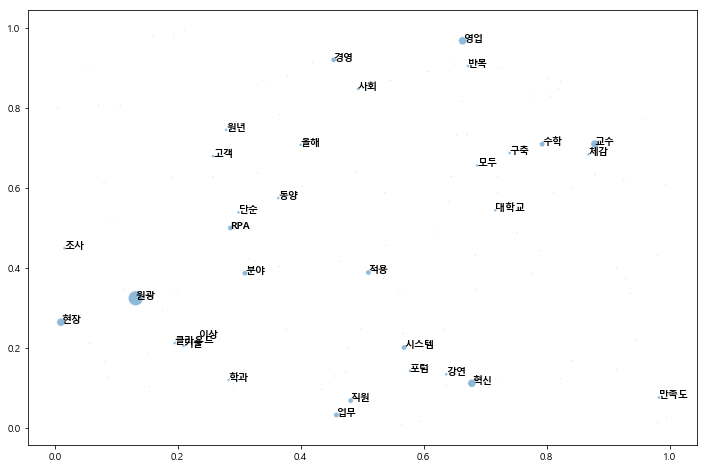

In [415]:
ax=sns.scatterplot(x,y,s=list(map(lambda e: e**3,freq.values())),alpha=0.5)
for key,value in enumerate(freq):
    if freq[value]>mean_freq:
        ax.text(x[key], y[key], value[0], horizontalalignment='left', size='medium', color='black', weight='semibold')

## 특이한 단어를 뽑아낼 필요성을 느낌 : TF-IDF 미리하기

In [416]:
import pickle

In [417]:
with open('Tagged_news.pickle', 'rb') as f:
    data = pickle.load(f) # 단 한줄씩 읽어옴

In [418]:
normal_words = [__ for _ in data for __ in _ if pattern.search(__[1])]

In [419]:
normal_dist = FreqDist(normal_words)

In [420]:
tfidf_dict = FreqDist()
for key in freq.keys():
    if key in normal_dist.keys():
        tfidf_dict[key] = freq.get(key)/normal_dist.get(key)
    else:
        tfidf_dict[key] = freq[key]

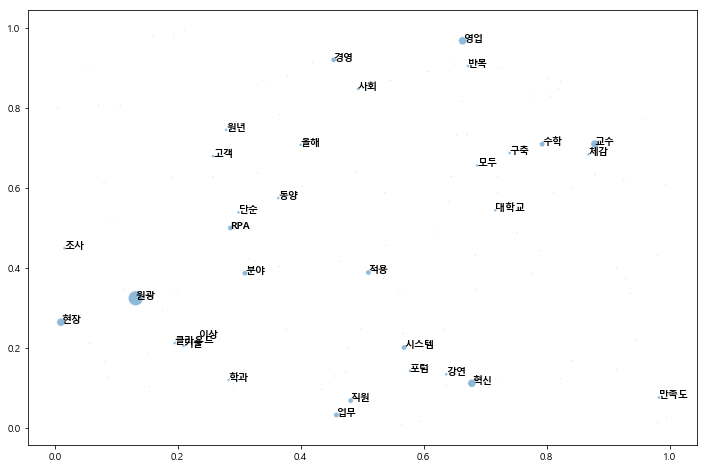

In [421]:
ax = sns.scatterplot(x,y,s = list(map(lambda e: e**3,freq.values())),alpha = 0.5)
for key,value in enumerate(freq):
    if freq[value]>mean_freq:
        ax.text(x[key], y[key], value[0], horizontalalignment = 'left', size = 'medium', color = 'black', weight = 'semibold', )

## 자기 자신은 빼야 함

In [66]:
"skt"

'skt'